In [60]:
'''The model uses Linear Regression to predict the Capacity of a battery based on the features ambient_temperature, Re, 
and Rct. It is trained on historical data and evaluated using Mean Squared Error to measure its prediction accuracy.'''

'The model uses Linear Regression to predict the Capacity of a battery based on the features ambient_temperature, Re, \nand Rct. It is trained on historical data and evaluated using Mean Squared Error to measure its prediction accuracy.'

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [41]:
df = pd.read_csv("C:/Users/Asus/Downloads/data.csv")

In [42]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   type                 7565 non-null   object
 1   start_time           7565 non-null   object
 2   ambient_temperature  7565 non-null   int64 
 3   battery_id           7565 non-null   object
 4   test_id              7565 non-null   int64 
 5   uid                  7565 non-null   int64 
 6   filename             7565 non-null   object
 7   Capacity             2794 non-null   object
 8   Re                   1956 non-null   object
 9   Rct                  1956 non-null   object
dtypes: int64(3), object(7)
memory usage: 591.1+ KB
None


In [43]:
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
type                      0
start_time                0
ambient_temperature       0
battery_id                0
test_id                   0
uid                       0
filename                  0
Capacity               4771
Re                     5609
Rct                    5609
dtype: int64


In [44]:
# Handle missing values for 'Capacity', 'Re', and 'Rct'
df['Re'] = pd.to_numeric(df['Re'], errors='coerce')
df['Rct'] = pd.to_numeric(df['Rct'], errors='coerce')

In [45]:
# Fill missing values in 'Re' and 'Rct' with their respective mean values
df['Re'] = df['Re'].fillna(df['Re'].mean())
df['Rct'] = df['Rct'].fillna(df['Rct'].mean())

In [46]:
df = df.dropna(subset=['Capacity'])
df['Capacity'] = pd.to_numeric(df['Capacity'], errors='coerce')

In [48]:
print(f"Missing values in X: {X.isnull().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")

Missing values in X: ambient_temperature    0
Re                     0
Rct                    0
dtype: int64
Missing values in y: 25


In [52]:
df = df.dropna(subset=['Capacity'])
X = df[['ambient_temperature', 'Re', 'Rct']]
y = df['Capacity']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train, y_train)

LinearRegression()

In [56]:
y_pred = model.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.13744727056294853


In [58]:
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Model Coefficients: [0.02519353 0.         0.        ]
Model Intercept: 0.8638735086497198


In [59]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

        Actual  Predicted
3721  1.710371   1.468518
4334  1.359028   0.964648
1038  1.799515   1.947195
2374  1.778977   1.972389
2774  1.461470   1.468518


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Asus\AppData\Local\Temp\ipykernel_1484\947574305.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_cleaned.corr()


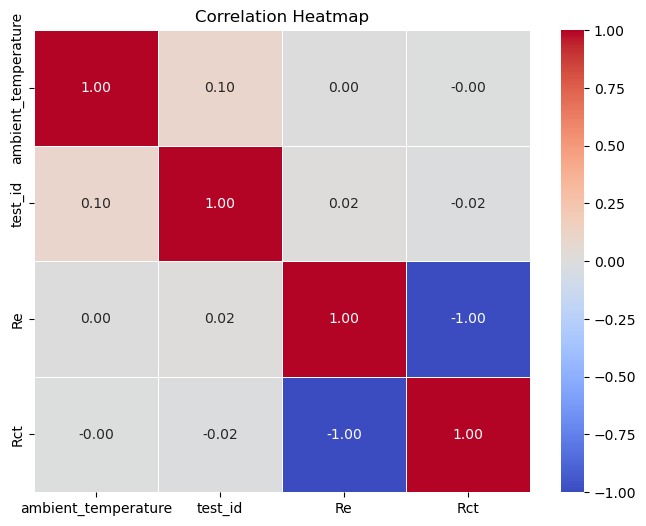

In [63]:
corr_matrix = df_cleaned.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
